In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import qiskit
from qiskit import *
from math import pi
from qiskit.test.mock import FakeLondon
from qiskit import Aer
from qiskit import aqua
from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel
from qiskit.visualization import plot_histogram
import math
import cmath

t=1
U=1
machine = FakeLondon()
simulator = Aer.get_backend('qasm_simulator')
noise_model1 = generateNoiseModel(machine, coherent = False, incoherent = False, readout= False)
noise_model2 = generateNoiseModel(machine, coherent = False, incoherent = False, readout= True)
noise_model3 = generateNoiseModel(machine, coherent = False, incoherent = True, readout= False)
noise_model4 = generateNoiseModel(machine, coherent = True, incoherent = False, readout= False)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


In [3]:
IBMQ.load_account()
provider=IBMQ.get_provider("ibm-q-education")

In [4]:
#dummy parameters
phi = pi/4
theta = pi/4

# Circuit

Lets make a function out of this which takes in a value for gamma and outputs the circuit with gamma = that value

In [5]:
def get_hopping_circ(phi, theta):
    
    qreg_q = QuantumRegister(8, 'q')
    creg_c = ClassicalRegister(8, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    # Initialization
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.cry(-pi/2, qreg_q[1], qreg_q[0])
    circuit.cry(-pi/2, qreg_q[3], qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])

    # Barrier
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])

    # Ansatz
    circuit.crz(phi, qreg_q[2], qreg_q[0])
    circuit.crz(phi, qreg_q[3], qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.crx(theta, qreg_q[1], qreg_q[0])
    circuit.crx(theta, qreg_q[3], qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])


    # Barrier
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])

    # Diagonalization
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.ch(qreg_q[1], qreg_q[0])
    circuit.ch(qreg_q[3], qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])
    
    # Barrier
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
    
    circuit.cx(qreg_q[0], qreg_q[4])
    circuit.cx(qreg_q[1], qreg_q[5])
    circuit.cx(qreg_q[2], qreg_q[6])
    circuit.cx(qreg_q[3], qreg_q[7])
    circuit.x(qreg_q[4])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])
    circuit.x(qreg_q[7])
    
    # Measurement
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[2], creg_c[2])
    circuit.measure(qreg_q[3], creg_c[3])
    circuit.measure(qreg_q[4], creg_c[4])
    circuit.measure(qreg_q[5], creg_c[5])
    circuit.measure(qreg_q[6], creg_c[6])
    circuit.measure(qreg_q[7], creg_c[7])
    
    return circuit

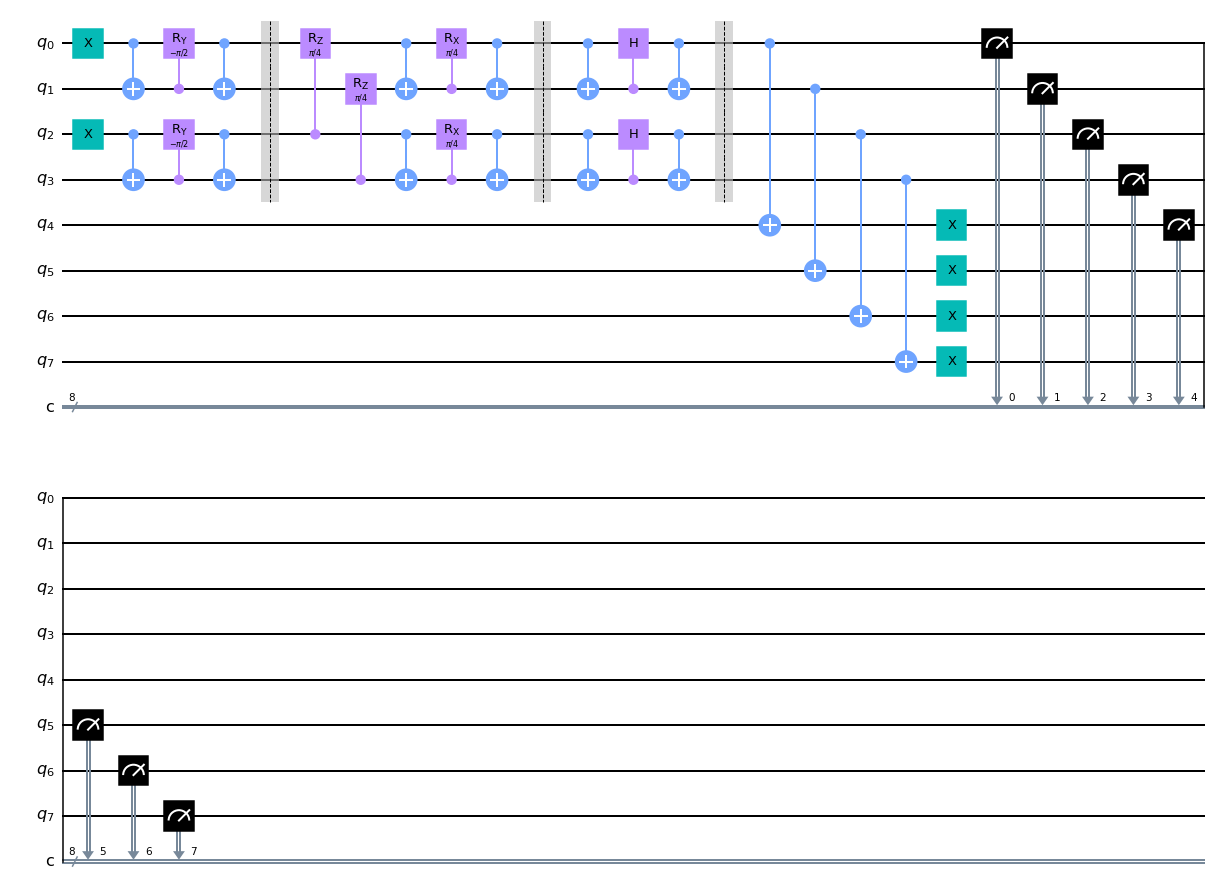

In [6]:
get_hopping_circ(phi, theta).draw('mpl')

In [7]:
def get_onsite_circ(phi, theta):
    
    qreg_q = QuantumRegister(8, 'q')
    creg_c = ClassicalRegister(8, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    # Initialization
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.cry(-pi/2, qreg_q[1], qreg_q[0])
    circuit.cry(-pi/2, qreg_q[3], qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])

    # Barrier
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])

    # Ansatz
    circuit.crz(phi, qreg_q[2], qreg_q[0])
    circuit.crz(phi, qreg_q[3], qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.crx(theta, qreg_q[1], qreg_q[0])
    circuit.crx(theta, qreg_q[3], qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])


    # Barrier
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
    
    circuit.cx(qreg_q[0], qreg_q[4])
    circuit.cx(qreg_q[1], qreg_q[5])
    circuit.cx(qreg_q[2], qreg_q[6])
    circuit.cx(qreg_q[3], qreg_q[7])
    circuit.x(qreg_q[4])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])
    circuit.x(qreg_q[7])
    
    # Measurement
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[2], creg_c[2])
    circuit.measure(qreg_q[3], creg_c[3])
    circuit.measure(qreg_q[4], creg_c[4])
    circuit.measure(qreg_q[5], creg_c[5])
    circuit.measure(qreg_q[6], creg_c[6])
    circuit.measure(qreg_q[7], creg_c[7])
    
    return circuit

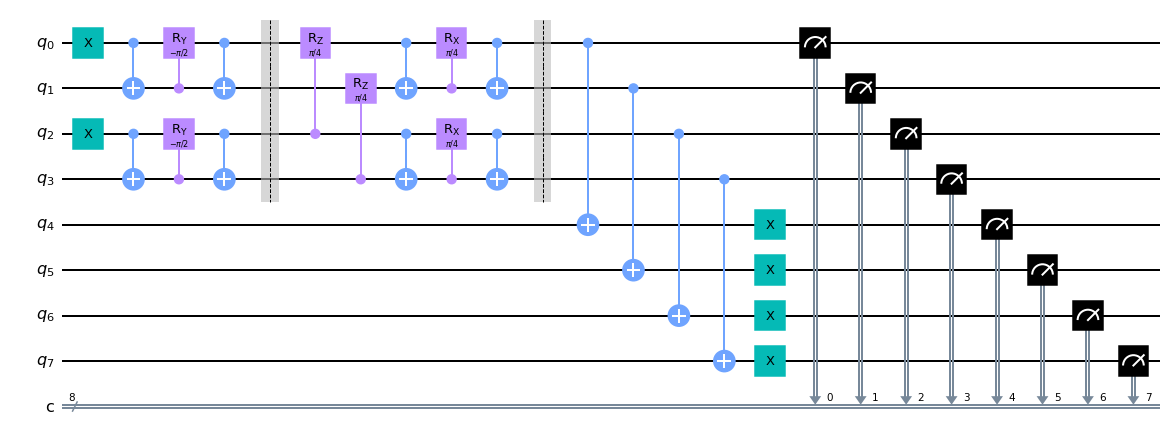

In [8]:
get_onsite_circ(phi, theta).draw('mpl')

# Measuring the circuit
We're gonna define some objective function/energy that has to be calculated using the resulting counts from the function

In [9]:
def get_hopping_counts(arr, noise_model):
    circ = get_hopping_circ(arr[0], arr[1])
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ, backend, noise_model=noise_model, shots = 8192)
    counts = job.result().get_counts()
    return counts

In [10]:
def get_onsite_counts(arr, noise_model):
    circ = get_onsite_circ(arr[0], arr[1])
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ, backend, noise_model=noise_model, shots = 8192)
    counts = job.result().get_counts()
    return counts

In [11]:
def new_counts(counts):
    counts_new = {}
     
    for key in counts:
        if counts_new.get(key[4:8]) != None:
            counts_new[key[4:8]]=counts_new[key[4:8]]+counts.get(key)
        else:
            counts_new[key[4:8]] = counts.get(key)

    return counts_new

In [12]:
def new_counts_mitigated(counts):
    counts_new = {}
     
    for key in counts:
        if key[7]==key[3] or key[6]==key[2] or key[5]==key[1] or key[4]==key[0]:
            counts[key] = 0
        if counts_new.get(key[4:8]) != None:
            counts_new[key[4:8]]=counts_new[key[4:8]]+counts.get(key)
        else:
            counts_new[key[4:8]] = counts.get(key)

    return counts_new

In [13]:
def find_energy(counts1, counts2):
    energy1 = -t*((counts1.get('1010', 0)+counts1.get('0110', 0))-(counts1.get('1001', 0)+counts1.get('0101', 0))+(counts1.get('1010', 0)+counts1.get('1001', 0))-(counts1.get('0110', 0)+counts1.get('0101', 0)))/sum(counts1.values())
    energy2 = U*(counts2.get('1010', 0)+counts2.get('0101', 0))/sum(counts2.values())
    return energy1 + energy2

##### Ready to Optimize

In [14]:
def f1(arr):
    counts1 = get_hopping_counts(arr, noise_model1)
    counts2 = get_onsite_counts(arr, noise_model1)
    counts1_new = new_counts(counts1)
    counts2_new = new_counts(counts2)
    return find_energy(counts1_new, counts2_new)

In [15]:
def f2(arr):
    counts1 = get_hopping_counts(arr, noise_model2)
    counts2 = get_onsite_counts(arr, noise_model2)
    counts1_new = new_counts_mitigated(counts1)
    counts2_new = new_counts_mitigated(counts2)
    return find_energy(counts1_new, counts2_new)

In [16]:
def f3(arr):
    counts1 = get_hopping_counts(arr, noise_model3)
    counts2 = get_onsite_counts(arr, noise_model3)
    counts1_new = new_counts_mitigated(counts1)
    counts2_new = new_counts_mitigated(counts2)
    return find_energy(counts1_new, counts2_new)

In [17]:
def f4(arr):
    counts1 = get_hopping_counts(arr, noise_model4)
    counts2 = get_onsite_counts(arr, noise_model4)
    counts1_new = new_counts_mitigated(counts1)
    counts2_new = new_counts_mitigated(counts2)
    return find_energy(counts1_new, counts2_new)

In [18]:
from scipy.optimize import minimize
import numpy as np
import random
from scipy.optimize import minimize
from qiskit.algorithms.optimizers import SPSA
import numpy as np
import random
import statistics

In [19]:
iterations1 = []
parameters1 = []
values1 = []
iterations2 = []
parameters2 = []
values2 = []
iterations3 = []
parameters3 = []
values3 = []
iterations4 = []
parameters4 = []
values4 = []

def callback_fn1(iteration, parameter, value, stepsize, accepted):
    if (accepted):
        iterations1.append(iteration/3)
        parameters1.append(parameter)
        values1.append(value)
        
def callback_fn2(iteration, parameter, value, stepsize, accepted):
    if (accepted):
        iterations2.append(iteration/3)
        parameters2.append(parameter)
        values2.append(value)

def callback_fn3(iteration, parameter, value, stepsize, accepted):
    if (accepted):
        iterations3.append(iteration/3)
        parameters3.append(parameter)
        values3.append(value)

def callback_fn4(iteration, parameter, value, stepsize, accepted):
    if (accepted):
        iterations4.append(iteration/3)
        parameters4.append(parameter)
        values4.append(value)
    
    
true = (-math.sqrt(17)+1)/2
    
spsa1 = SPSA(maxiter=200, callback=callback_fn1)
param1, value1, nefv1 = spsa1.optimize(num_vars=2, objective_function=f1, gradient_function=None, variable_bounds=None, initial_point=np.array([0, 0.1]))

spsa2 = SPSA(maxiter=200, callback=callback_fn2)
param2, value2, nefv2 = spsa2.optimize(num_vars=2, objective_function=f2, gradient_function=None, variable_bounds=None, initial_point=np.array([0, 0.1]))

spsa3 = SPSA(maxiter=200, callback=callback_fn3)
param3, value3, nefv3 = spsa3.optimize(num_vars=2, objective_function=f3, gradient_function=None, variable_bounds=None, initial_point=np.array([0, 0.1]))

spsa4 = SPSA(maxiter=200, callback=callback_fn4)
param4, value4, nefv4 = spsa4.optimize(num_vars=2, objective_function=f4, gradient_function=None, variable_bounds=None, initial_point=np.array([0, 0.1]))

avg1 = 0
new_arr1 = []
avg2 = 0
new_arr2 = []
avg3 = 0
new_arr3 = []
avg4 = 0
new_arr4 = []

for i in range(len(values1)-100, len(values1)):
    avg1 += values1[i]
    new_arr1.append(values1[i])
avg1 /= 100
    
    
for i in range(len(values2)-100, len(values2)):
    avg2 += values2[i]
    new_arr2.append(values2[i])
avg2 /= 100

for i in range(len(values3)-100, len(values3)):
    avg3 += values3[i]
    new_arr3.append(values3[i])
avg3 /= 100

for i in range(len(values4)-100, len(values4)):
    avg4 += values4[i]
    new_arr4.append(values4[i])
avg4 /= 100


phi1 = param1[0]
theta1 = param1[1]
energy_diff1 = value1-true
avg_diff1 = avg1-true
stdev1 = statistics.stdev(new_arr1)

phi2 = param2[0]
theta2 = param2[1]
energy_diff2 = value2-true
avg_diff2 = avg2-true
stdev2 = statistics.stdev(new_arr2)

phi3 = param2[0]
theta3 = param2[1]
energy_diff3 = value3-true
avg_diff3 = avg3-true
stdev3 = statistics.stdev(new_arr3)

phi4 = param4[0]
theta4 = param4[1]
energy_diff4 = value4-true
avg_diff4 = avg4-true
stdev4 = statistics.stdev(new_arr4)

In [20]:
%store energy_diff1
%store phi1
%store theta1
%store energy_diff2
%store phi2
%store theta2
%store iterations1
%store parameters1
%store values1
%store iterations2
%store parameters2
%store values2
%store avg1
%store avg2
%store new_arr1
%store new_arr2

Stored 'energy_diff1' (float)
Stored 'phi1' (float64)
Stored 'theta1' (float64)
Stored 'energy_diff2' (float)
Stored 'phi2' (float64)
Stored 'theta2' (float64)
Stored 'iterations1' (list)
Stored 'parameters1' (list)
Stored 'values1' (list)
Stored 'iterations2' (list)
Stored 'parameters2' (list)
Stored 'values2' (list)
Stored 'avg1' (float)
Stored 'avg2' (float)
Stored 'new_arr1' (list)
Stored 'new_arr2' (list)


In [21]:
print("Energy Difference: ", energy_diff1)
print("Average Difference: ", avg_diff1)
print("Standard Deviation: ", stdev1)
print("Phi: ", phi1)
print("Theta: ", theta1)
print("Phi: ", phi1%(2*pi))
print("Theta: ", theta1%(2*pi))

Energy Difference:  -0.0009471871911697072
Average Difference:  0.0009009573400802218
Standard Deviation:  0.007433209846814489
Phi:  -6.5116473434720445
Theta:  5.568418258604317
Phi:  6.054723270887128
Theta:  5.568418258604317


In [22]:
print("Energy Difference: ", energy_diff2)
print("Average Difference: ", avg_diff2)
print("Standard Deviation: ", stdev2)
print("Phi: ", phi2)
print("Theta: ", theta2)
print("Phi: ", phi2%(2*pi))
print("Theta: ", theta2%(2*pi))

Energy Difference:  -0.0021779233868830516
Average Difference:  0.003288059248984121
Standard Deviation:  0.007835018297413364
Phi:  -19.069622486226336
Theta:  -16.520713908239053
Phi:  6.0631187424920086
Theta:  2.328842013299706


In [23]:
print("Energy Difference: ", energy_diff3)
print("Average Difference: ", avg_diff3)
print("Standard Deviation: ", stdev3)
print("Phi: ", phi3)
print("Theta: ", theta3)
print("Phi: ", phi3%(2*pi))
print("Theta: ", theta3%(2*pi))

Energy Difference:  0.1346729299963303
Average Difference:  0.12364876007445535
Standard Deviation:  0.007950038247082798
Phi:  -19.069622486226336
Theta:  -16.520713908239053
Phi:  6.0631187424920086
Theta:  2.328842013299706


In [24]:
print("Energy Difference: ", energy_diff4)
print("Average Difference: ", avg_diff4)
print("Standard Deviation: ", stdev4)
print("Phi: ", phi4)
print("Theta: ", theta4)
print("Phi: ", phi4%(2*pi))
print("Theta: ", theta4%(2*pi))

Energy Difference:  0.1887500784338303
Average Difference:  0.16725227569945522
Standard Deviation:  0.01027907760438057
Phi:  -6.0339431286681116
Theta:  -2.3532479581777825
Phi:  0.24924217851147468
Theta:  3.9299373490018037


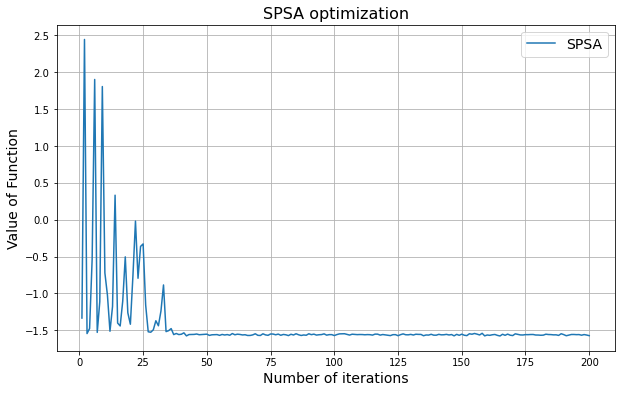

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(iterations1, values1, label="SPSA")
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("Value of Function", fontsize=14)
plt.grid()

plt.title("SPSA optimization", fontsize=16)
plt.legend(fontsize=14)
plt.show()
plt.show()

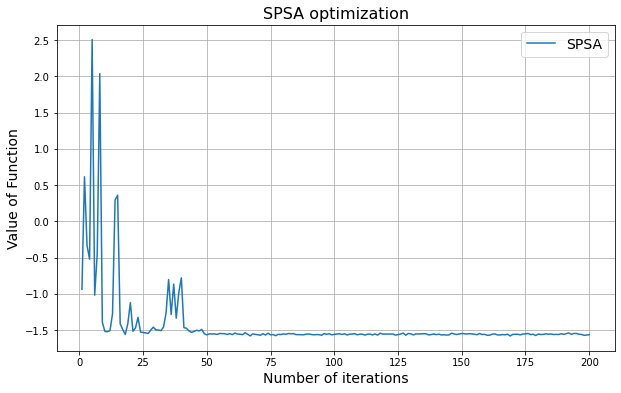

In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(iterations2, values2, label="SPSA")
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("Value of Function", fontsize=14)
plt.grid()

plt.title("SPSA optimization", fontsize=16)
plt.legend(fontsize=14)
plt.show()
plt.show()

In [35]:
for i in range(len(new_arr1)):
    new_arr1[i] -= true
for i in range(len(new_arr2)):
    new_arr2[i] -= true
for i in range(len(new_arr3)):
    new_arr3[i] -= true
for i in range(len(new_arr4)):
    new_arr4[i] -= true

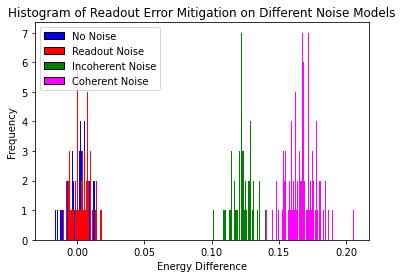

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

a = plt.figure()
plt.hist(new_arr1, bins=100, color = "blue")
plt.hist(new_arr2, bins=100, color = "red")
plt.hist(new_arr3, bins=100, color = "green")
plt.hist(new_arr4, bins=100, color = "magenta")

colors = ["blue", "red", "green", "magenta"]
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["No Noise", "Readout Noise", "Incoherent Noise", "Coherent Noise"]
plt.legend(handles, labels)

plt.title("Histogram of Readout Error Mitigation on Different Noise Models")
plt.xlabel("Energy Difference")
plt.ylabel("Frequency")
plt.show()
#a.savefig('Normal(1).png', dpi = 1000)